In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import scipy
from PIL import Image
import skimage
from skimage import data
from skimage.transform import warp, AffineTransform
import matplotlib.pyplot as plt
import copy
import os

In [2]:
def display_gray(x: np.array, normalized:bool = False):
    plt.figure(figsize=(10,10))
    if not normalized:
        plt.imshow(x,cmap='gray',vmin=0,vmax=1)
    else:
        plt.imshow(x/x.max(),cmap='gray',vmin=0,vmax=1)

In [3]:
def display_axis(ax: plt.axis, x: np.array, title: str, normalized:bool = False):
    if not normalized:
        ax.imshow(x,cmap='gray',vmin=0,vmax=1)
    else:
        ax.imshow(x/x.max(),cmap='gray',vmin=0,vmax=1)
    ax.set_title(title,size=18)

In [4]:
def display_axis_bw(ax: plt.axis, x: np.array, title: str, normalized:bool = False, fig = None):
    if not normalized:
        imax = ax.imshow(x,cmap='gray',vmin=0,vmax=1)
    else:
        imax = ax.imshow(x/x.max(),cmap='gray',vmin=0,vmax=1)
    ax.set_title(title,size=18)
    fig.colorbar(imax,ax=ax)

In [5]:
def display_axis_color(ax: plt.axis, x: np.array, title: str, normalized:bool = False, fig = None):
    if not normalized:
        imax = ax.imshow(x,cmap='coolwarm',vmin=0,vmax=1)
    else:
        imax = ax.imshow(x/x.max(),cmap='coolwarm',vmin=0,vmax=1)
    ax.set_title(title,size=18)
    fig.colorbar(imax,ax=ax)

### Blob Detection

In [6]:
def conv2D(image: np.array, kernel: np.array = None):
    
    #Flip the kernel
    flipped_kernel = np.fliplr(kernel) 
    flipped_kernel = np.flipud(flipped_kernel)
    
    #Size Variables
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
    
    #Output
    padding = kernel.shape[0]//2
    imagePadded = np.pad(image, ((padding,padding), (padding,padding)), constant_values = ((0,0),(0,0)))
    answer = np.zeros(image.shape)
    
    
    for x in range (image_h):
        for y in range (image_w):
            answer[x,y] = (kernel*imagePadded[x:x + kernel_w, y:y + kernel_h]).sum()
            
                    
    return answer
                    
        
            

In [7]:
def make_circle(img: np.array, x: int, y: int, radius: int):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if np.sqrt((x-i)**2 + (y-j)**2) < 1.0*radius:
                img[i,j]=1
    return img

In [8]:
def draw_circle(img, y, radius):
    rad_buffer = radius + 5
    start = rad_buffer+5
    end = 255 - rad_buffer - 5
    centers = np.linspace(start, end, int((end-start)/(2*rad_buffer)))
    for c in centers:
        c = int(c)
        make_circle(img, y, c, radius)
    return img

In [9]:
blob_img = np.zeros((256,256))
blob_img = draw_circle(blob_img, 25, 5)
blob_img = draw_circle(blob_img, 50, 10)
blob_img = draw_circle(blob_img, 85, 15)
blob_img = draw_circle(blob_img, 130, 20)
blob_img = draw_circle(blob_img, 200, 35)

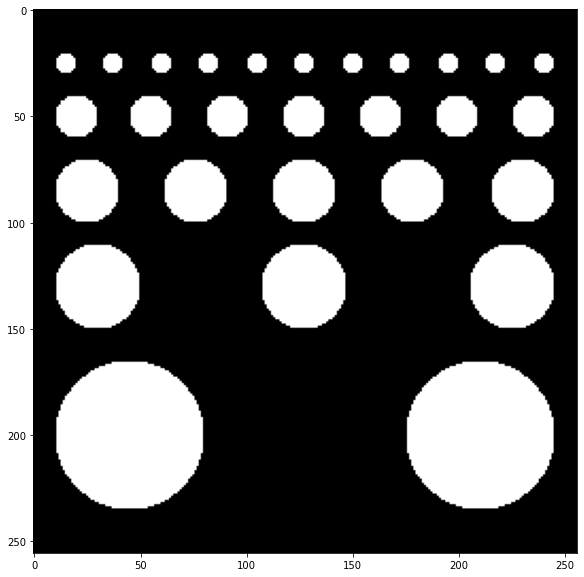

In [10]:
display_gray(blob_img)

In [11]:
img = copy.deepcopy(blob_img)

In [12]:
def log_filter(size: int, sigma: float):
    
    miux = size//2
    miuy = size//2
    
    log_result = np.zeros((size,size))
    
    for x in range(size):
        for y in range(size): 
            x1 = ((x-miux)**2 + (y-miuy)**2 - 2*(sigma**2))/(2*np.pi*(sigma**6))
            x2 = np.exp(-((x-miux)**2 + (y-miuy)**2)/(2*sigma**2))
            log_result[x,y] = x1*x2*(sigma**2)
            
    
    
    return log_result

In [13]:
sigma_1 = 3
log_1 = log_filter(21, sigma_1)
sigma_2 = 6
log_2 = log_filter(31, sigma_2)
sigma_3 = 10
log_3 = log_filter(41, sigma_3)
sigma_4 = 14.2
log_4 = log_filter(51, sigma_4)
sigma_5 = 25
log_5 = log_filter(81, sigma_5)

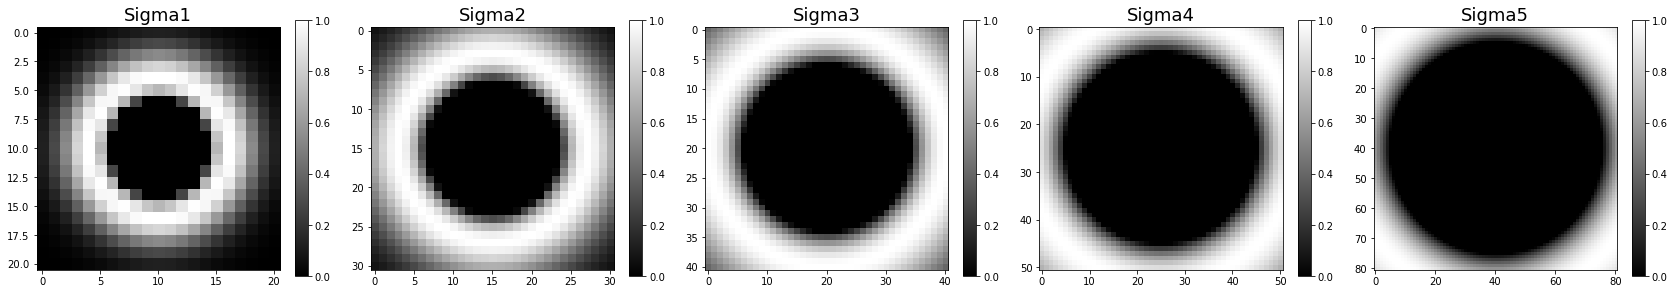

In [14]:
fig, ax = plt.subplots(1,5,figsize=(1 + 5*4.5,4))
display_axis_bw(ax[0],log_1,'Sigma1',normalized=True,fig=fig)
display_axis_bw(ax[1],log_2,'Sigma2',normalized=True,fig=fig)
display_axis_bw(ax[2],log_3,'Sigma3',normalized=True,fig=fig)
display_axis_bw(ax[3],log_4,'Sigma4',normalized=True,fig=fig)
display_axis_bw(ax[4],log_5,'Sigma5',normalized=True,fig=fig)
fig.tight_layout()
os.makedirs('Data/Solutions', exist_ok=True)
fig.savefig('Data/Solutions/question_2_7.pdf', format='pdf', bbox_inches='tight')

Convolve the image with the 5 filters. Note that we multiply the filters with -1 so that the maximum response is positive.

In [15]:
log_conv_1 = conv2D(img, -log_1)
log_conv_2 = conv2D(img, -log_2)
log_conv_3 = conv2D(img, -log_3)
log_conv_4 = conv2D(img, -log_4)
log_conv_5 = conv2D(img, -log_5)

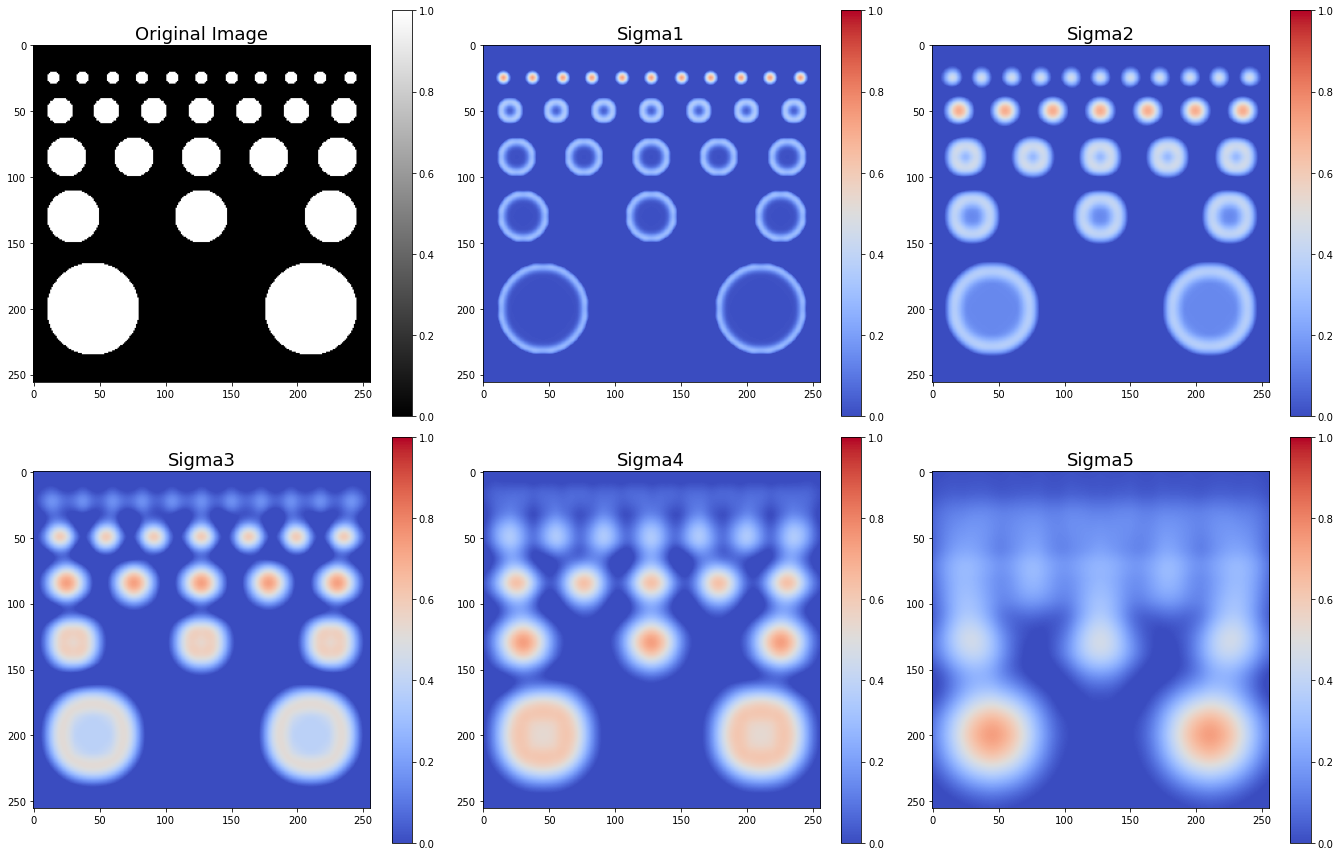

In [16]:
fig, ax = plt.subplots(2,3,figsize=(1 + 3*6,2*6))
display_axis_bw(ax[0,0],img,'Original Image',fig=fig)
display_axis_color(ax[0,1],log_conv_1,'Sigma1',fig=fig)
display_axis_color(ax[0,2],log_conv_2,'Sigma2',fig=fig)
display_axis_color(ax[1,0],log_conv_3,'Sigma3',fig=fig)
display_axis_color(ax[1,1],log_conv_4,'Sigma4',fig=fig)
display_axis_color(ax[1,2],log_conv_5,'Sigma5',fig=fig)
fig.tight_layout()
fig.savefig('Data/Solutions/question_2_8.pdf', format='pdf', bbox_inches='tight')

## Corner Detection

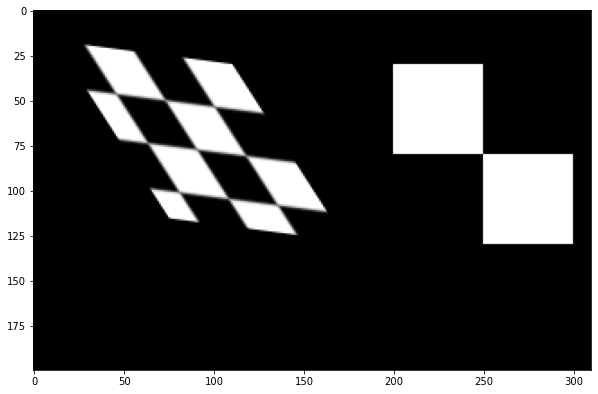

In [17]:
# Sheared checkerboard
tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(110, 30))
image = warp(data.checkerboard()[:90, :90], tform.inverse,
             output_shape=(200, 310))

# Two squares
image[30:80, 200:250] = 1
image[80:130, 250:300] = 1

display_gray(image)

### Computing Image Gradients

In [18]:
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

In [19]:
def compute_image_gradient(image: np.array):
    
    x = conv2D(image, sobel_x)
    y = conv2D(image, sobel_y)
    
    return x,y


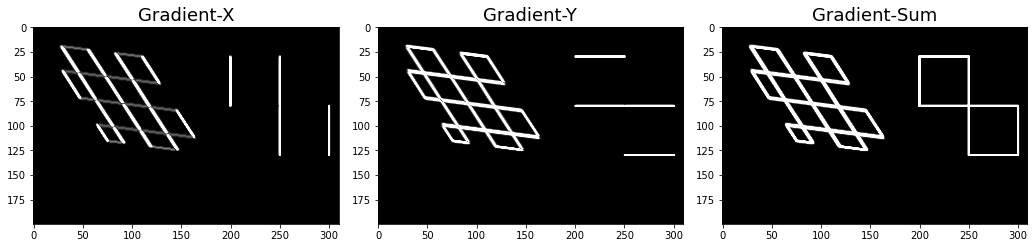

In [20]:
fig, ax = plt.subplots(1,3,figsize=(1 + 3*4.5,4))
img_gradient_x, img_gradient_y = compute_image_gradient(image)
display_axis(ax[0], np.abs(img_gradient_x), 'Gradient-X')
display_axis(ax[1], np.abs(img_gradient_y), 'Gradient-Y')
display_axis(ax[2], np.abs(img_gradient_x) + np.abs(img_gradient_y), 'Gradient-Sum')
fig.tight_layout()
os.makedirs('Data/Solutions', exist_ok=True)
fig.savefig('Data/Solutions/question_3_2.pdf', format='pdf', bbox_inches='tight')

### **Computing the Covariance Matrix**

In [21]:
# This is the standard box filter which computes the mean of all the pixels inside the filter.
def average_filter(size: int):
    assert size%2 == 1
    return 1.0 * np.ones((size,size))/(size**2)

In [22]:
def grad_covariance(image: np.array, size: int):
       
    x,y = compute_image_gradient(image)
    
    avg = average_filter(size)
    
    xx = np.multiply(x,x)
    
    xy = np.multiply(x,y)
    
    yy = np.multiply(y,y)
    
    Ixx = conv2D(xx, avg) 
    Ixy = conv2D(xy, avg)
    Iyy = conv2D(yy, avg)
    
    return Ixx, Ixy, Iyy

### **Harris Response Function**

In [23]:
def harris_response(image: np.array, k: float, size: int):
    
    #Find the covariance matrix  
    Ixx, Ixy, Iyy = grad_covariance(image, size)
    
    #Initialize ranges
    shift = int(size/2)
    y_max = image.shape[0] - shift
    x_max = image.shape[1] - shift
    
    #Set the output matrix
    output = np.zeros_like(image)
    
    #Loop
    for y in range(shift, y_max):
        for x in range(shift, x_max):
            
            #Compute sum of Ixx, Ixy, Iyy through sliding window
            SumIxx = Ixx[y-shift : y+shift+1, x-shift : x+shift+1].sum()
            SumIxy = Ixy[y-shift : y+shift+1, x-shift : x+shift+1].sum()
            SumIyy = Iyy[y-shift : y+shift+1, x-shift : x+shift+1].sum()

            #Determinant and trace 
            det = (SumIxx * SumIyy) - (SumIxy**2)
            trace = SumIxx + SumIyy
            
            #Compute harris equation
            R = det - k*(trace**2)
            output[y,x] = R
    
    return output

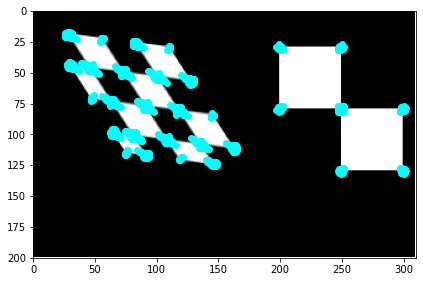

In [24]:
coords = np.argwhere(harris_response(image, 0.05, 3) > 0.02)
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
ax.axis((0, 310, 200, 0))
fig.tight_layout()
plt.show()
fig.savefig('Data/Solutions/harris_response.pdf', format='pdf', bbox_inches='tight')

### **Non-Maximum Suppression**

In [25]:
def threshold_harris_response(harris_response: np.array, threshold: float):
    
    return np.argwhere(harris_response > threshold)

In [31]:
def sort_detections(candidate_detections: np.array, harris_response: np.array):
    
    sort = {}
    sortedArray = []
    
    for coordinate in candidate_detections: 
        sort[coordinate[0], coordinate[1]] = harris_response[coordinate[0],coordinate[1]]
    
    #Sort the coordinates of candidate detections based on harris response value
    for position in sorted(sort, key=lambda harris_response_value:sort[harris_response_value]):
        sortedArray.append(np.asarray(position))
    
    return sortedArray[::-1]

In [32]:
def l2_distance(p1: np.array, p2: np.array):
    return np.linalg.norm(p1 - p2, ord=2)

In [33]:
def local_max(sorted_detections: np.array, distance: float):
    
    pos1 = 0
    
    while(pos1 < len(sorted_detections)):
        #print("pos1 is ", pos1, "\n")
        pos2 = pos1+1
        while(pos2 < len(sorted_detections)): 
            #print("pos2 is ", pos2, "\n")
            if(l2_distance(sorted_detections[pos1], sorted_detections[pos2]) > distance): 
                pos2+=1
            else: 
                sorted_detections = np.delete(sorted_detections, pos2, 0)   
                
        pos1+=1

    #print(sorted_detections)
    return(sorted_detections)


In [34]:
def non_max_suppression(harris_response: np.array, distance: float, threshold: float):
    
    threshold = threshold_harris_response(harris_response, threshold) 
    
    sortedArray = sort_detections(threshold, harris_response)
    
    return local_max(sortedArray, distance) 

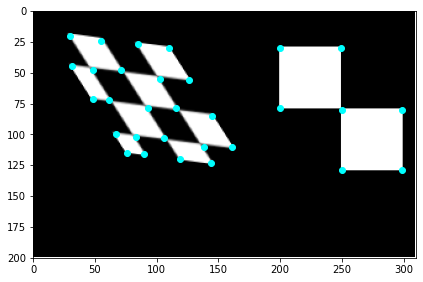

In [39]:
coords = non_max_suppression(harris_response(image, 0.05, 3), 13.0, 0.02)
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
ax.axis((0, 310, 200, 0))
fig.tight_layout()
plt.show()
fig.savefig('Data/Solutions/corner_detection.pdf', format='pdf', bbox_inches='tight')